# Importing the Data

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Data Preperation

## Loading the Iris dataset

In [102]:
data = load_iris()
X,y =data.data, data.target

## One-hot encode the labels

In [103]:
y = to_categorical(y)

## Splitting the dataset into training and testing sets

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.45, random_state = 35)

## Scaling the feature 

In [127]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the Model

In [128]:
model = Sequential([
    Dense(64, input_shape =(X_train.shape[1],), activation ='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation ='relu'),
    Dense(3, activation = 'softmax')
])

C:\Users\furka\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compiling the model

In [129]:
model.compile(optimizer ='adam', loss='categorical_crossentropy', metrics =['accuracy'])

## Training the model

In [130]:
history = model.fit(X_train,y_train, epochs=25, batch_size =3, validation_split =0.2,verbose =1)

Epoch 1/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2252 - loss: 1.1044 - val_accuracy: 0.8824 - val_loss: 0.9499
Epoch 2/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7965 - loss: 0.9223 - val_accuracy: 0.8824 - val_loss: 0.7807
Epoch 3/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7907 - loss: 0.7486 - val_accuracy: 0.8824 - val_loss: 0.6222
Epoch 4/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8312 - loss: 0.5970 - val_accuracy: 0.8824 - val_loss: 0.4902
Epoch 5/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8554 - loss: 0.4907 - val_accuracy: 0.8824 - val_loss: 0.4003
Epoch 6/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9079 - loss: 0.3289 - val_accuracy: 0.8824 - val_loss: 0.3432
Epoch 7/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8378 - loss: 0.4247 - val_accuracy: 0.8824 - val_loss: 0.2915
Epoch 8/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9140 - loss: 0.2725 - val_accuracy: 0.8824 - val_loss

# Evaluating the Model

In [131]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose = 0.15)
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.9265


## Make predictions on test set

In [132]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions,axis =1)
true_classes = np.argmax(y_test, axis =1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


## Printing the predictions vs actual labes

In [133]:
print("Predicted labels: ", predicted_classes)
print("True labels:",true_classes)

Predicted labels:  [1 1 2 1 0 2 2 1 1 0 1 2 0 2 0 2 1 0 0 0 1 1 2 1 0 0 0 2 0 2 0 2 1 0 1 1 0
 2 2 1 1 0 0 1 2 2 0 2 2 1 2 1 1 2 0 1 1 1 0 1 0 2 0 2 1 1 0 0]
True labels: [1 1 2 1 0 2 2 1 1 0 1 2 0 2 0 2 1 0 0 0 1 1 2 1 0 0 0 2 0 2 0 1 2 0 1 2 0
 2 2 2 1 0 0 1 2 2 0 2 2 1 2 1 1 1 0 1 1 1 0 1 0 2 0 2 1 1 0 0]


# Comparision

In [134]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming 'predicted_classes' are the predicted labels (from model predictions)
# and 'true_classes' are the actual labels

# 1. Calculate accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Accuracy: {accuracy:.4f}")

# 2. Generate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("\nConfusion Matrix:")
print(conf_matrix)

# 3. Print classification report
class_report = classification_report(true_classes, predicted_classes, target_names=data.target_names)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.9265

Confusion Matrix:
[[23  0  0]
 [ 0 22  2]
 [ 0  3 18]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        23
  versicolor       0.88      0.92      0.90        24
   virginica       0.90      0.86      0.88        21

    accuracy                           0.93        68
   macro avg       0.93      0.92      0.93        68
weighted avg       0.93      0.93      0.93        68



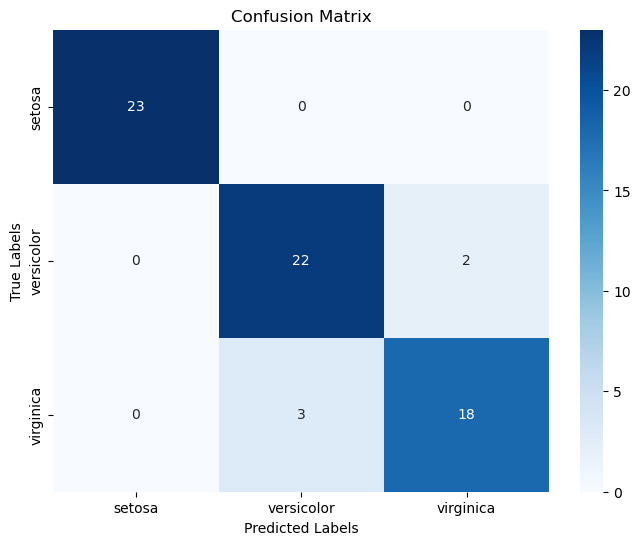

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [136]:
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)

X_test:  (68, 4)
y_test:  (68, 3)
X_train:  (82, 4)
y_train:  (82, 3)
